In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
taiwan_real_estate = pd.read_csv(r"C:\Users\PC\Desktop\Oluwatobi\Python\Statistics in Python\Introduction to Regression with statsmodels in Python\taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

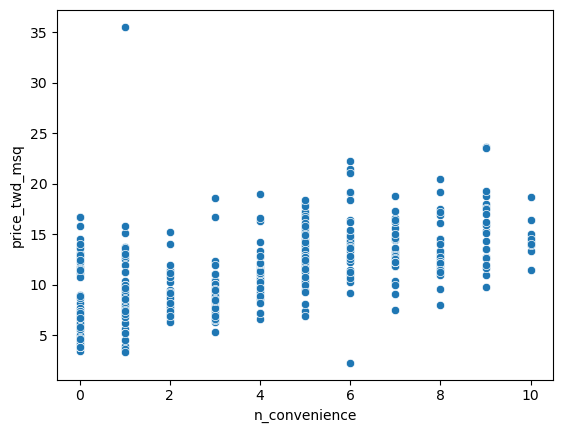

In [4]:
sns.scatterplot(y = 'price_twd_msq',
                x = 'n_convenience',
                data = taiwan_real_estate
               )

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

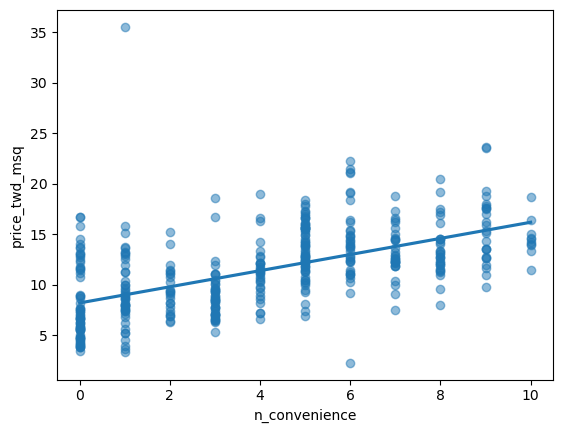

In [5]:
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

In [6]:
from statsmodels.formula.api import ols

In [7]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data = taiwan_real_estate)

In [8]:
mdl_price_vs_conv = mdl_price_vs_conv.fit()

In [9]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

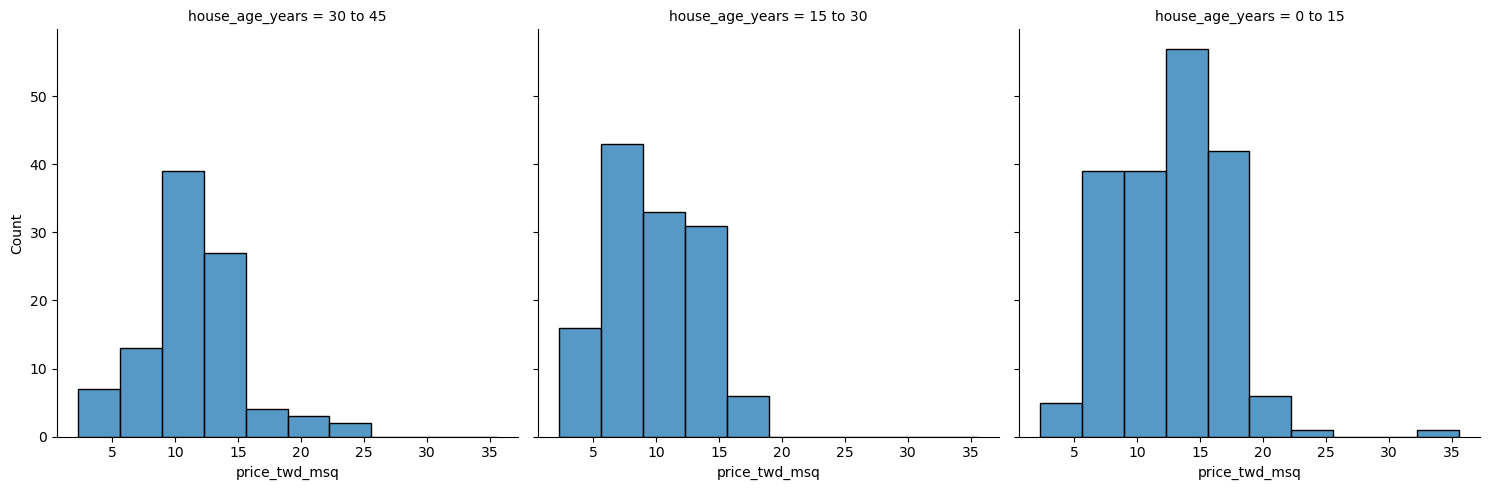

In [11]:
sns.displot(data = taiwan_real_estate,
            x = "price_twd_msq",
            col = "house_age_years",
            col_wrap = 3,
            bins = 10)

In [14]:
taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [16]:
ols("price_twd_msq~house_age_years", data = taiwan_real_estate).fit().params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

In [17]:
ols("price_twd_msq~house_age_years + 0", data = taiwan_real_estate).fit().params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64